In [335]:
# task 1:
'''Importa db owid-covid-data'''

import pandas as pd

df = pd.read_csv('owid-covid-data.csv')

'''Si richiede di verificare le dimensioni del dataset e i relativi metadati'''

pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

In [729]:
# do una prima occhiata per farmi un'udea sul dataframe
df.sample(30)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
206123,LVA,Europe,Latvia,2022-01-31,388987.0,0.0,7635.43,5225.0,0.0,12.00,206791.61,0.00,4059.11,2777.69,0.00,6.38,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6050839.0,9411.0,3228.98,5.02,22576.0,12.05,0.34,3.0,tests performed,2.787898e+06,1337073.0,1287889.0,447090.0,3408.0,5256.0,150.64,72.25,69.59,24.16,2840.0,515.0,0.03,41.10,31.21,43.9,19.75,14.14,25063.85,0.7,350.06,4.91,25.6,51.0,NaN,5.57,75.29,0.87,1850654,NaN,NaN,NaN,NaN
164967,OWID_HIC,NaN,High-income countries,2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.838222e+09,998718911.0,929254011.0,836954440.0,31281.0,31889.0,226.96,79.86,74.31,66.93,26.0,44.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250514600,NaN,NaN,NaN,NaN
307623,POL,Europe,Poland,2024-05-07,6662631.0,0.0,15.71,120711.0,0.0,0.00,173570.50,0.00,0.41,3144.68,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.03,41.8,16.76,10.20,27216.44,NaN,227.33,5.91,23.3,33.1,NaN,6.62,78.73,0.88,39857144,NaN,NaN,NaN,NaN
205992,LVA,Europe,Latvia,2021-09-22,150558.0,0.0,481.00,2825.0,0.0,5.14,80039.00,0.00,255.71,1501.81,0.00,2.73,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4148102.0,27216.0,2213.60,14.52,24569.0,13.11,0.02,50.1,tests performed,1.584316e+06,880133.0,819579.0,103.0,6558.0,5208.0,85.61,47.56,44.29,0.01,2814.0,2762.0,0.15,37.96,31.21,43.9,19.75,14.14,25063.85,0.7,350.06,4.91,25.6,51.0,NaN,5.57,75.29,0.87,1850654,NaN,NaN,NaN,NaN
303041,PHL,Asia,Philippines,2020-12-20,458035.0,9704.0,1386.29,8911.0,181.0,25.86,4019.11,85.15,12.16,78.19,1.59,0.23,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6132558.0,24379.0,53.85,0.21,32513.0,0.29,0.05,21.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,351.87,25.2,4.80,2.66,7599.19,NaN,370.44,7.07,7.8,40.8,78.46,1.00,71.23,0.72,115559008,NaN,NaN,NaN,NaN
282523,OWID_CYN,Asia,Northern Cyprus,2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.173890e+05,284357.0,275988.0,80243.0,NaN,6011.0,161.27,74.28,72.09,20.96,15701.0,721.0,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382836,NaN,NaN,NaN,NaN
166063,OWID_HIC,NaN,High-income countries,2022-05-18,300723510.0,0.0,444317.29,2491483.0,0.0,1122.14,246349.62,0.00,363.98,2041.00,0.00,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [731]:
# analisi genrale del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [1250]:
# trasformo colonna da float a int
df['total_cases'] = df['total_cases'].fillna(0).astype(int)

In [1252]:
# calcoliamo percentuale dati nulli su colonne in cui sono presenti
if df.isna().sum().sum() > 0:
    for column in df.columns:
        n_null = df[column].isna().sum()
        percentuale_null = round((n_null / df.shape[0]) * 100, 2)
        if percentuale_null > 0:
            print(column, 'contiene:', n_null,'dati null. Rappresentano il', percentuale_null,'% della colonna')
else:
    print('il db NON presenta dati null')

continent contiene: 26525 dati null. Rappresentano il 6.18 % della colonna
new_cases contiene: 19276 dati null. Rappresentano il 4.49 % della colonna
new_cases_smoothed contiene: 20506 dati null. Rappresentano il 4.78 % della colonna
total_deaths contiene: 17631 dati null. Rappresentano il 4.11 % della colonna
new_deaths contiene: 18827 dati null. Rappresentano il 4.38 % della colonna
new_deaths_smoothed contiene: 20057 dati null. Rappresentano il 4.67 % della colonna
total_cases_per_million contiene: 17631 dati null. Rappresentano il 4.11 % della colonna
new_cases_per_million contiene: 19276 dati null. Rappresentano il 4.49 % della colonna
new_cases_smoothed_per_million contiene: 20506 dati null. Rappresentano il 4.78 % della colonna
total_deaths_per_million contiene: 17631 dati null. Rappresentano il 4.11 % della colonna
new_deaths_per_million contiene: 18827 dati null. Rappresentano il 4.38 % della colonna
new_deaths_smoothed_per_million contiene: 20057 dati null. Rappresentano il 4

In [1254]:
# rimozione di eventuali righe duplicate
df.drop_duplicates()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0,0.0,NaN,0.0,0.0,NaN,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.21,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.6,2.82,1.88,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.21,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.6,2.82,1.88,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.21,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN

In [1314]:
# task 2:
'''• Si chiede poi per ogni continente di trovare il numero di casi totali
avvenuti in quello stesso continente; 

si chiede di non considerare eventuali locazioni che nel dataset
non appartengono ad alcun continente'''

df.groupby('continent')['new_cases'].sum()
print(df.groupby('continent')['new_cases'].sum())

df.groupby(['continent','location'])['total_cases'].max().groupby('continent').sum()

# ho usato due metodi differenti che dovrebbero dare lo stesso risultato,
# Per la colonna dei casi totali, total_cases, avendo dati incrementali, la funzione max() che ho utilizzato
# riporta il totale dei casi, mentre la colonna new_cases registra i casi per singolo giorno e ho usato il sum().

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


continent
Africa            13145540
Asia             301532347
Europe           252916868
North America    124492666
Oceania           15003352
South America     68809418
Name: total_cases, dtype: int64

In [1258]:
df.groupby('location')['total_cases'].max()

location
Afghanistan                            235214
Africa                               13145380
Albania                                335047
Algeria                                272139
American Samoa                           8359
Andorra                                 48015
Angola                                 107481
Anguilla                                 3904
Antigua and Barbuda                      9106
Argentina                            10101218
Armenia                                452273
Aruba                                   44224
Asia                                301499099
Australia                            11861161
Austria                               6082444
Azerbaijan                             835757
Bahamas                                 39127
Bahrain                                696614
Bangladesh                            2051348
Barbados                               108582
Belarus                                994037
Belgium                  

In [1292]:
# task 3:
'''• Sempre riguardo i casi totali, si chiede di scrivere del codice che,
date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi
descrittori statistici: valore massimo, media, e percentuale rispetto al numero 
dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)'''

# calcolo dei casi totali in Asia e in Europa e la media dei massimi dei suoi stati
max_total_cases_Asia = df.total_cases[df.location == 'Asia'].max()
mean_total_cases_Asia = round(df[df.continent == 'Asia'].groupby('location')['total_cases'].max().mean(), 2)

# calcolo dei casi totali in Europa e la media dei massimi dei suoi stati
max_total_cases_Europa = df.total_cases[df.location == 'Europe'].max()
mean_total_cases_Europe = round(df[df.continent == 'Europe'].groupby('location')['total_cases'].max().mean(), 2)

# casi totali nel mondo
total_cases = df.total_cases.max()

print('       Asia\n','max:', max_total_cases_Asia)
print('       Asia\n','mean:', mean_total_cases_Asia)
print('\n')
print('       Europa\n','max:', max_total_cases_Europa)
print('       Europa\n','mean:', mean_total_cases_Europe)
print('\n')

# calcolo percentuale dei casi Asia e Europa rispetto ai casi totali nel mondo
percentuale_total_cases_Asia_in_World = round(max_total_cases_Asia / total_cases * 100,  2)
percentuale_total_cases_Europe_in_World = round(max_total_cases_Europa / total_cases * 100, 2)

print("% dei casi totali dell'Asia nel mondo\n",percentuale_total_cases_Asia_in_World)
print('\n')
print("% dei casi totali dell'Europa nel mondo\n",percentuale_total_cases_Europe_in_World)

       Asia
 max: 301499099
       Asia
 mean: 5912398.96


       Europa
 max: 252916868
       Europa
 mean: 4598488.51


% dei casi totali dell'Asia nel mondo
 38.86


% dei casi totali dell'Europa nel mondo
 32.6


<Axes: title={'center': 'Andamento casi incrementali Italia'}, xlabel='Anno 2022', ylabel='totale casi incrementali'>

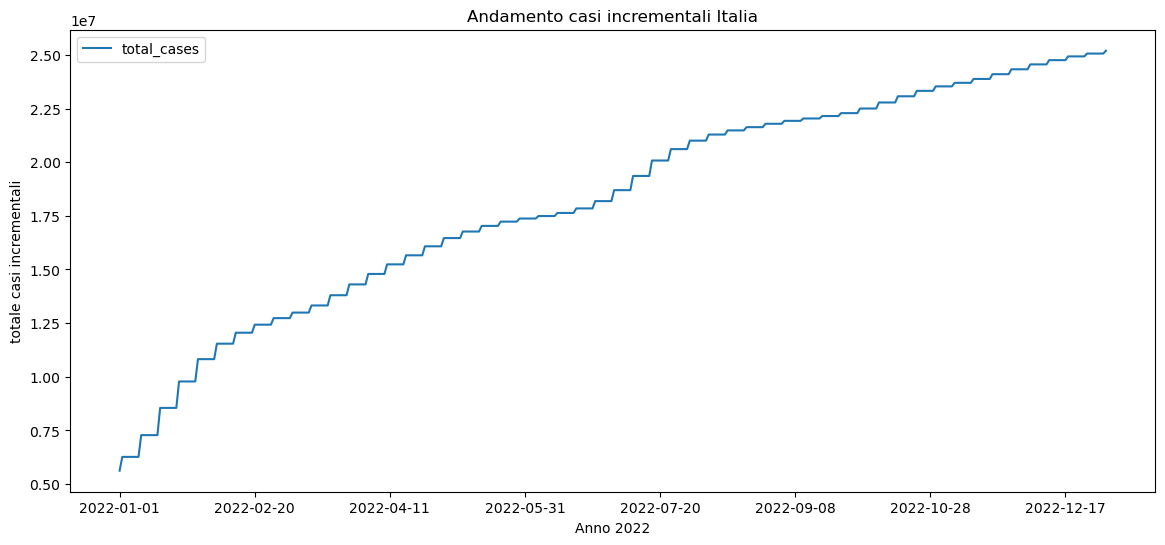

In [439]:
# task 4:
'''• Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico
adeguato l'evoluzione del casi totali rispetto alla data'''

df_italy = df[df.location.str.contains('Italy')]
df_italy_2022 = df_italy.loc[186002:186367] # df_italy[df_italy.date.str.contains('2022')]
df_italy_2022.loc[:,'location':'total_cases'].plot(x = 'date', 
                                                   y = 'total_cases', 
                                                   figsize = (14,6),
                                                   xlabel = 'Anno 2022',
                                                   ylabel = 'totale casi incrementali', 
                                                   title = 'Andamento casi incrementali Italia')

<Axes: title={'center': 'Andamento nuovi casi Italia'}, xlabel='Anno 2022', ylabel='Nuovi casi'>

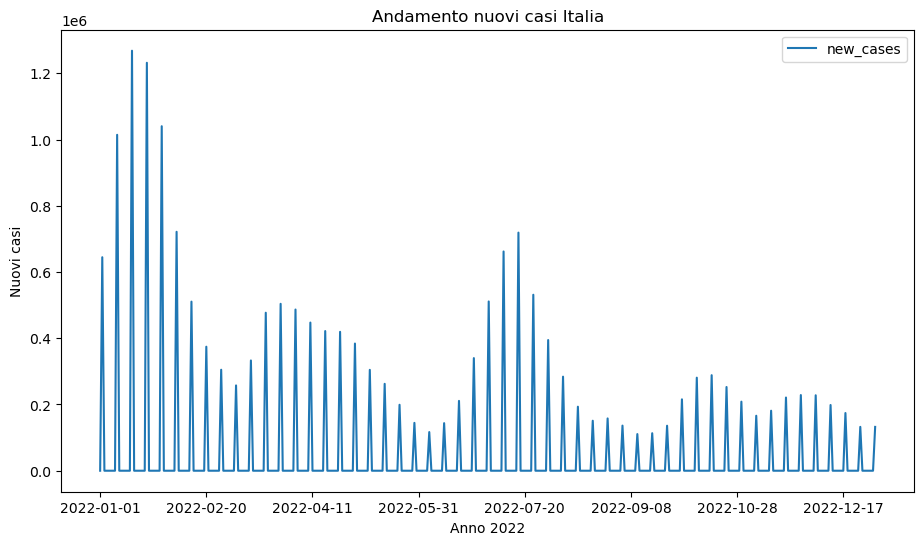

In [437]:
# task 5:
'''Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data 
(filtrare i dati se necessario)'''

df_italy_2022.loc[:,'location':'new_cases'].plot(x = 'date', 
                                                 y = 'new_cases', 
                                                 figsize = (11,6),
                                                 xlabel = 'Anno 2022',
                                                 ylabel = 'Nuovi casi', 
                                                 title = 'Andamento nuovi casi Italia')

/var/folders/vc/xmxnctpn68bgqfqxcmbthyfr0000gn/T/ipykernel_31868/1969593429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy_2022['new_cases_cumulativi'] = df_italy_2022[['new_cases']].cumsum()


<Axes: title={'center': 'Andamento nuovi casi cumulativi Italia'}, xlabel='Anno 2022', ylabel='Nuovi casi cumulativi'>

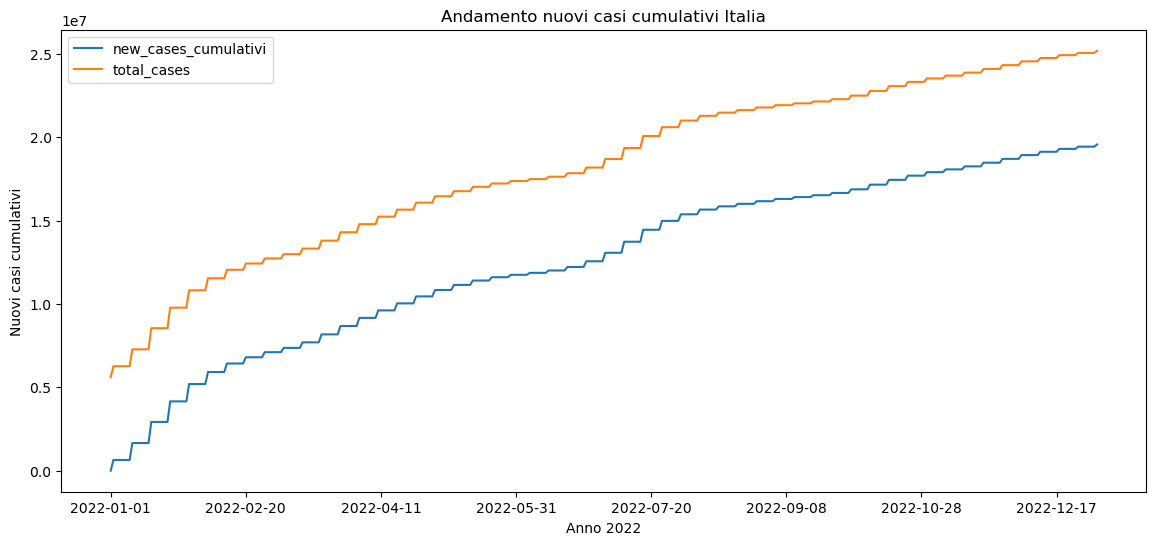

In [1177]:
#task 6:
'''
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
e commentare se ci sono similarità con l'andamento del numero dei casi totali'''

df_italy_2022['new_cases_cumulativi'] = df_italy_2022[['new_cases']].cumsum()
df_italy_2022[['location','date','new_cases_cumulativi','total_cases']].plot(x = 'date', 
                                                               y = ['new_cases_cumulativi', 'total_cases'],
                                                               figsize = (14,6),
                                                               xlabel = 'Anno 2022',
                                                               ylabel = 'Nuovi casi cumulativi', 
                                                               title = 'Andamento nuovi casi cumulativi Italia')

In [589]:
# alternativa per avere la somma cumulativa nuovi casi del 2022:
somma = 0
somma_cumulativa = []
for valore in df_italy_2022.new_cases:
    somma += valore
    somma_cumulativa.append(somma)

df_italy_2022['somma_cumulativa_ciclo_for'] = somma_cumulativa
df_italy_2022[['new_cases_cumulativi','somma_cumulativa_ciclo_for']].sample(10)

/var/folders/vc/xmxnctpn68bgqfqxcmbthyfr0000gn/T/ipykernel_31868/1424336004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy_2022['somma_cumulativa_ciclo_for'] = somma_cumulativa


,new_cases_cumulativi,somma_cumulativa_ciclo_for
186364,19438072.0,19438072.0
186309,17908592.0,17908592.0
186204,14454432.0,14454432.0
186272,16662381.0,16662381.0
186118,10456778.0,10456778.0
186365,19438072.0,19438072.0
186045,6430899.0,6430899.0
186052,6805342.0,6805342.0
186226,15664340.0,15664340.0
186236,16008567.0,16008567.0


In [ ]:
'''commentare se ci sono similarità con l'andamento del numero dei casi totali'''

# si, perchè per avere l'andamento della somma cumulativa nuovi casi del 2022, ho dovuto sommare 
# il valore successivo con il precedente e così facendo è stata ricreata una situazione analoga ai dati incrementali
# presenti nella colonna total_cases.

<Axes: xlabel='location', ylabel='icu_patients'>

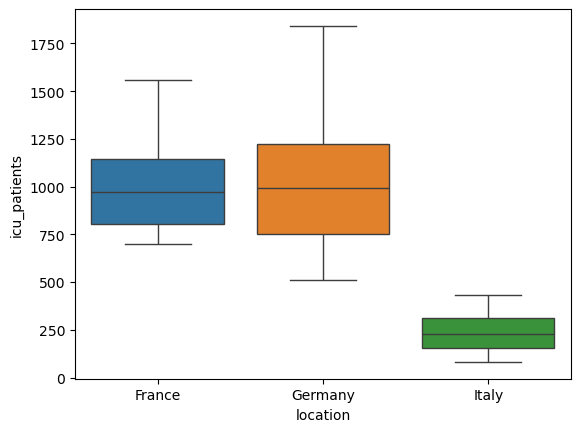

In [773]:
# task 7:
'''• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot 
la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva
(Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso),
e scrivere un breve commento a riguardo'''

import seaborn as sns

df_Italy_Germany_France = df[df.location.isin(['Italy','Germany','France'])]
df_Italy_Germany_France_2022_2023 = df_Italy_Germany_France[(df_Italy_Germany_France['date'] >= '2022-05') & 
                                                            (df_Italy_Germany_France['date'] < '2023-05')]

sns.boxplot(data = df_Italy_Germany_France_2022_2023, y ='icu_patients', x='location', hue= 'location')

In [714]:
'''scrivere un breve commento a riguardo'''

# l'Italia mostra un numero inferiore di pazienti in terapia intensiva rispetto a Francia e Germania.
# il picco massimo raggiunto in italia è inferiore al minimo raggiunto dalla Germania la quale risulta essera 
# quella con più pazienti in terapia intensiva in questo specifico arco temporale.

434.0

In [879]:
# task 8:
'''Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, 
mostrare la somma dei pazienti ospitalizzati per ognuna 
— se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.'''

df_Italy_Germany_France_Spain = df[df.location.isin(['Italy','Germany','France','Spain'])]
df_Italy_Germany_France_Spain_2023 = df_Italy_Germany_France_Spain[df_Italy_Germany_France_Spain['date'].str.contains('2023')]

df_Italy_Germany_France_Spain_2023.groupby('location')['hosp_patients'].sum()
print(df_Italy_Germany_France_Spain_2023.groupby('location')['hosp_patients'].sum())

percentuale_null_hosp_patients = round((df_Italy_Germany_France_Spain_2023.hosp_patients.isnull().sum() / df_Italy_Germany_France_Spain_2023.shape[0] * 100),2)

print('\nla percentuale dei dati null presenti nella colonna hosp_patients è:',percentuale_null_hosp_patients)

# essendo che la percentuale dei dati null presenti nella colonna di riferimento è del 57.74, a mio avviso,
# è sconsigliato procedere per sostituzione, in quanto i valori sostituiti incederebbero considerevolmente
# sull'accuratezza dei risultati finali.

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

la percentuale dei dati null presenti nella colonna hosp_patients è: 57.74


843